In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Function to compute histogram
def compute_histogram(image):
    hist = [0] * 256
    for row in image:
        for pixel in row:
            hist[pixel] += 1
    return hist

# Function to compute CDF
def compute_cdf(hist):
    cdf = [0] * 256
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]
    cdf_min = min(cdf)
    total_pixels = sum(hist)
    return [(val - cdf_min) / (total_pixels - cdf_min) for val in cdf]

# Function to match histograms
def match_histograms(source, target):
    source_hist = compute_histogram(source)
    target_hist = compute_histogram(target)

    source_cdf = compute_cdf(source_hist)
    target_cdf = compute_cdf(target_hist)

    # Create mapping from source to target
    mapping = [0] * 256
    for src_val in range(256):
        best_match = 0
        min_diff = float("inf")
        for tgt_val in range(256):
            diff = abs(source_cdf[src_val] - target_cdf[tgt_val])
            if diff < min_diff:
                min_diff = diff
                best_match = tgt_val
        mapping[src_val] = best_match

    # Apply mapping
    matched_image = [[mapping[pixel] for pixel in row] for row in source]
    return matched_image

# Load images
def load_grayscale_image(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return [[int(pixel) for pixel in row] for row in image]

def display_images(source, target, matched):
    plt.figure(figsize=(12, 12))

    plt.subplot(1, 3, 1)
    plt.title("Source Image")
    plt.imshow(source, cmap="gray")

    plt.subplot(1, 3, 2)
    plt.title("Target Image")
    plt.imshow(target, cmap="gray")

    plt.subplot(1, 3, 3)
    plt.title("Matched Image")
    plt.imshow(matched, cmap="gray")

    plt.show()


Processed image saved to: ./matched-1.png


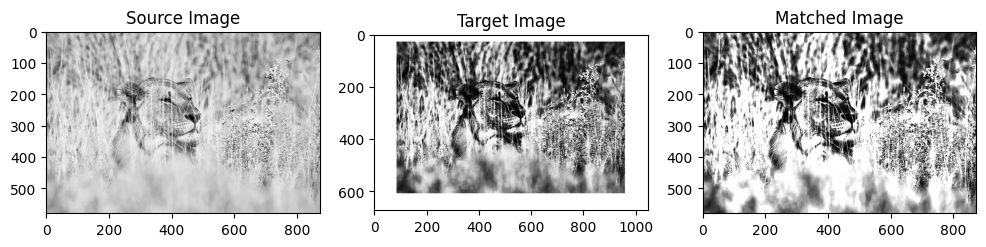

In [9]:

# Load images
source_image = load_grayscale_image("./sourceandtargets/source-1.jpg")
target_image = load_grayscale_image("./sourceandtargets/target-1.jpg")

# Perform histogram matching
matched_image = match_histograms(source_image, target_image)
output_path = "./matched-1.png"

# Convert matched_image to numpy array
matched_image_np = np.array(matched_image, dtype=np.uint8)

cv2.imwrite(output_path, matched_image_np)
print(f"Processed image saved to: {output_path}")

# Display results
display_images(source_image, target_image, matched_image_np)

Processed image saved to: ./matched-2.png


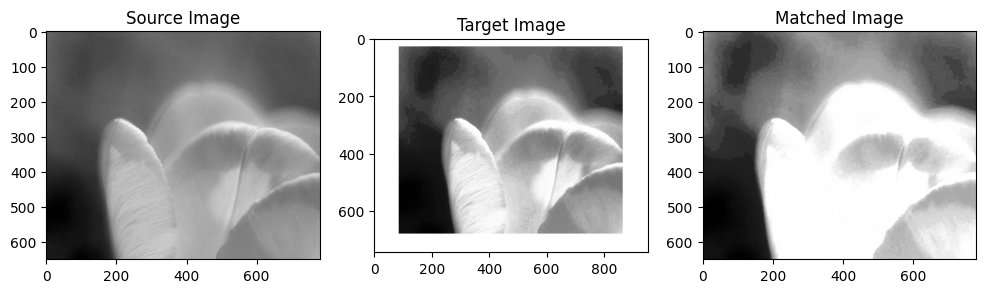

In [10]:

# Load images
source_image = load_grayscale_image("./sourceandtargets/source-2.jpg")
target_image = load_grayscale_image("./sourceandtargets/target-2.jpg")

# Perform histogram matching
matched_image = match_histograms(source_image, target_image)
output_path = "./matched-2.png"

# Convert matched_image to numpy array
matched_image_np = np.array(matched_image, dtype=np.uint8)

cv2.imwrite(output_path, matched_image_np)
print(f"Processed image saved to: {output_path}")

# Display results
display_images(source_image, target_image, matched_image_np)

Processed image saved to: ./matched-3.png


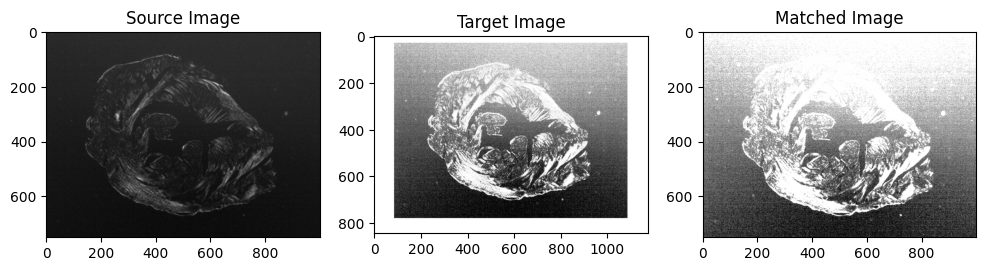

In [11]:

# Load images
source_image = load_grayscale_image("./sourceandtargets/source-3.jpg")
target_image = load_grayscale_image("./sourceandtargets/target-3.jpg")

# Perform histogram matching
matched_image = match_histograms(source_image, target_image)
output_path = "./matched-3.png"

# Convert matched_image to numpy array
matched_image_np = np.array(matched_image, dtype=np.uint8)

cv2.imwrite(output_path, matched_image_np)
print(f"Processed image saved to: {output_path}")

# Display results
display_images(source_image, target_image, matched_image_np)

Processed image saved to: ./matched-4.png


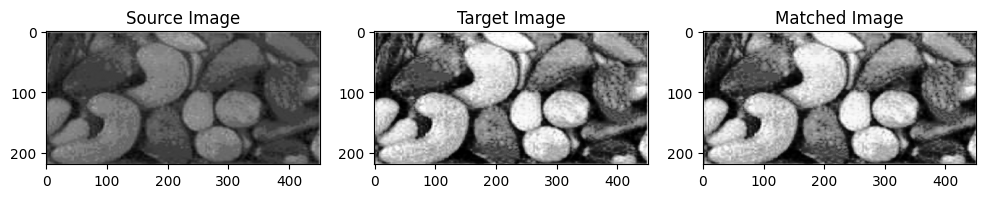

In [12]:

# Load images
source_image = load_grayscale_image("./sourceandtargets/source-4.png")
target_image = load_grayscale_image("./sourceandtargets/target-4.png")

# Perform histogram matching
matched_image = match_histograms(source_image, target_image)
output_path = "./matched-4.png"

# Convert matched_image to numpy array
matched_image_np = np.array(matched_image, dtype=np.uint8)

cv2.imwrite(output_path, matched_image_np)
print(f"Processed image saved to: {output_path}")

# Display results
display_images(source_image, target_image, matched_image_np)